In [1]:
#!pip install mlxtend
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from warnings import simplefilter
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import statsmodels.api as sm
from sklearn.utils import resample

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

seed = 2
df1 = pd.read_csv('pavingschedule.csv')
df2 = pd.read_csv('road_accidents_PA.csv')
data_guide = pd.ExcelFile('Road-Accident-Safety-Data-Guide.xls')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df1.head()

,id,street_id,activity,task_description,status,street,start_year,stop_date_actual,route_ahead,route_back
0,1924601586,17060,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,BALDWICK RD,2016,2016-10-31,NOBLESTOWN RD,STEEN ST
1,1512981617,9881,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,GLENBURY ST,2016,2016-10-31,KOHEN ST,SELDON ST
2,640675845,6563,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FILMORE ST,FIFTH AVE
3,538119097,17748,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FORBES AVE,FILMORE ST
4,726876041,17060,Base Repair,NaN,Completed,BALDWICK RD,2009,2009-06-05,NOBLESTOWN RD,STEEN ST


In [3]:
df2.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,city,county,street_name
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Burrell,Westmoreland,SHERLOCK ST
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sharon,Mercer,CRANE AVE
2,201506E098766,2,9,0,18,0,8,0,0,0,...,0.0,0.0,0.0,0.0,9.0,1.0,3.0,Philadelphia,Philadelphia,MCCOOK ST
3,201506E098777,1,20,0,4,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Chester,Delaware,HILLCREST ST
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philadelphia,Philadelphia,COWAN ST


In [4]:
df2.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_(district)',
       'local_authority_(highway)', '1st_road_class', '1st_road_number',
       'road_type', 'speed_limit', 'junctio

In [5]:
df2.shape

(285331, 68)

In [6]:
df2.loc[df2['city'] == 'Pittsburgh']

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,city,county,street_name
36,201506E099797,1,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,N LANG AVE
37,201506E099797,2,1,0,18,0,8,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,Pittsburgh,Allegheny,DAMAS ST
45,201506E099976,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,COMPROMISE ST
49,201506E099988,2,1,0,18,0,8,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,5.0,Pittsburgh,Allegheny,N LANG AVE
52,201506F000007,1,9,0,18,0,0,0,4,0,...,0.0,0.0,0.0,0.0,9.0,3.0,9.0,Pittsburgh,Allegheny,DUNLAP ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285285,2015984133015,1,3,0,9,0,8,0,0,0,...,0.0,0.0,0.0,0.0,3.0,3.0,-1.0,Pittsburgh,Allegheny,MULBERRY WAY
285298,2015984137515,1,9,0,18,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,CALIFORNIA AVE
285303,2015984139115,1,19,0,18,0,0,1,0,0,...,0.0,0.0,0.0,0.0,19.0,2.0,6.0,Pittsburgh,Allegheny,FILMORE ST
285316,2015984141415,1,9,0,18,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,CAREY WAY


In [7]:
Pitt_df = df2.loc[df2['city'] == 'Pittsburgh'].reset_index(drop=True)
Pitt_df

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,city,county,street_name
0,201506E099797,1,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,N LANG AVE
1,201506E099797,2,1,0,18,0,8,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,Pittsburgh,Allegheny,DAMAS ST
2,201506E099976,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,COMPROMISE ST
3,201506E099988,2,1,0,18,0,8,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,5.0,Pittsburgh,Allegheny,N LANG AVE
4,201506F000007,1,9,0,18,0,0,0,4,0,...,0.0,0.0,0.0,0.0,9.0,3.0,9.0,Pittsburgh,Allegheny,DUNLAP ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26294,2015984133015,1,3,0,9,0,8,0,0,0,...,0.0,0.0,0.0,0.0,3.0,3.0,-1.0,Pittsburgh,Allegheny,MULBERRY WAY
26295,2015984137515,1,9,0,18,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,CALIFORNIA AVE
26296,2015984139115,1,19,0,18,0,0,1,0,0,...,0.0,0.0,0.0,0.0,19.0,2.0,6.0,Pittsburgh,Allegheny,FILMORE ST
26297,2015984141415,1,9,0,18,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,CAREY WAY


In [8]:
Pitt_df.isnull().sum()

accident_index                0
vehicle_reference             0
vehicle_type                  0
towing_and_articulation       0
vehicle_manoeuvre             0
                           ... 
casualty_home_area_type    9101
casualty_imd_decile        9101
city                          0
county                        0
street_name                   0
Length: 68, dtype: int64

In [9]:
Pitt_df.shape

(26299, 68)

In [10]:
Pitt_df = Pitt_df.dropna(axis=0, subset=['time'])
Pitt_df.shape

(26295, 68)

In [11]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [12]:
Pitt_df.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile,NUmber_of_Casualities_unique_to_accident_index,No_of_Vehicles_involved_unique_to_accident_index,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,city,county,street_name
0,201506E099797,1,9,0,18,0,8,0,0,0,0,1,1,6,1,30,6,-1,-1,-1,-1,-1,-1,1,2,6,2,2,1,08/31/2009,7,1899-12-30 10:50:00,102,E08000003,3,5079,3,30,1,4,4,5093,0,0,1,1,1,0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,N LANG AVE
1,201506E099797,2,1,0,18,0,8,0,0,0,0,2,1,6,2,33,6,-1,-1,-1,-1,1,-1,1,2,6,2,2,1,05/03/2010,7,1899-12-30 10:50:00,102,E08000003,3,5079,3,30,1,4,4,5093,0,0,1,1,1,0,0,1,2,1.0,1.0,2.0,33.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,Pittsburgh,Allegheny,DAMAS ST
2,201506E099976,2,9,0,18,0,8,0,0,0,0,1,1,6,2,51,8,998,1,1,-1,1,-1,1,2,6,3,2,1,12/23/2017,5,1899-12-30 12:25:00,102,E08000003,6,0,6,20,3,4,6,0,0,0,1,1,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Allegheny,COMPROMISE ST
3,201506E099988,2,1,0,18,0,8,0,0,0,0,1,1,2,1,33,6,-1,-1,-1,-1,1,-1,1,2,6,2,2,1,02/15/2015,4,1899-12-30 08:45:00,102,E08000003,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,1.0,1.0,1.0,33.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,Pittsburgh,Allegheny,N LANG AVE
4,201506F000007,1,9,0,18,0,0,0,4,0,0,1,1,1,1,51,8,1997,2,2,-1,3,-1,2,3,6,3,3,2,08/15/2017,5,1899-12-30 12:05:00,107,E08000006,3,57,3,40,0,-1,-1,0,0,4,1,1,1,0,0,1,1,1.0,1.0,1.0,51.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,9.0,Pittsburgh,Allegheny,DUNLAP ST


In [13]:
#show one row of df
Pitt_df.iloc[1][:]

accident_index             201506E099797
vehicle_reference                      2
vehicle_type                           1
towing_and_articulation                0
vehicle_manoeuvre                     18
                               ...      
casualty_home_area_type                1
casualty_imd_decile                    1
city                          Pittsburgh
county                         Allegheny
street_name                     DAMAS ST
Name: 1, Length: 68, dtype: object

In [14]:
Pitt_df.shape

(26295, 68)

In [15]:
#pd.set_option('display.max_rows', 99)
Pitt_df.isin([-1]).sum()

accident_index                0
vehicle_reference             0
vehicle_type                  3
towing_and_articulation      22
vehicle_manoeuvre            11
                           ... 
casualty_home_area_type    1927
casualty_imd_decile        3375
city                          0
county                        0
street_name                   0
Length: 68, dtype: int64

In [16]:
Pitt_df = Pitt_df.drop(columns=['driver_imd_decile', 'vehicle_imd_decile', 'junction_control',
                               '1st_road_class', '2nd_road_class', 'age_band_of_driver',
                                'age_band_of_casualty', 'age_of_vehicle', 'engine_capacity_(cc)',
                               'was_vehicle_left_hand_drive?', 'propulsion_code',
                               'casualty_reference', '2nd_road_number', 'city', 'sex_of_casualty',
                               'sex_of_driver', 'NUmber_of_Casualities_unique_to_accident_index','1st_road_number',
                               'No_of_Vehicles_involved_unique_to_accident_index', 'did_police_officer_attend_scene_of_accident',
                               'local_authority_(district)', 'local_authority_(highway)', 'casualty_class',
                               'age_of_casualty', 'accident_index', 'vehicle_reference', 'vehicle_type',
                               'towing_and_articulation', 'vehicle_manoeuvre', 'journey_purpose_of_driver',
                               'police_force', 'car_passenger', 'bus_or_coach_passenger', 'driver_home_area_type',
                                'date', 'age_of_driver', 'skidding_and_overturning', 'special_conditions_at_site',
                               'hit_object_off_carriageway', 'carriageway_hazards', 'hit_object_in_carriageway',
                               'pedestrian_road_maintenance_worker', 'vehicle_location-restricted_lane', 
                                'vehicle_leaving_carriageway', 'time', 'pedestrian_movement',
                               'junction_location', 'pedestrian_location', 'casualty_severity', 'casualty_type',
                               '1st_point_of_impact', 'county', 'street_name'])

In [17]:
print(Pitt_df.shape)

(26295, 15)


In [18]:
Pitt_df = Pitt_df.rename(columns={'pedestrian_crossing-human_control': 'pedestrian_crossing-human', 
                                  'pedestrian_crossing-physical_facilities': 'pedestrian_crossing-physical',
                                 'urban_or_rural_area': 'urban_rural'})
table_names = data_guide.sheet_names[2:]
dimension_tables = []
for table in range(len(table_names)):
    dimension_tables.append((table_names[table], table_names[table].lower().replace(' - ','-').replace(' ', '_').replace('ped', 'pedestrian')))

In [19]:
dimension_tables

[('Police Force', 'police_force'),
 ('Accident Severity', 'accident_severity'),
 ('Day of Week', 'day_of_week'),
 ('Local Authority (District)', 'local_authority_(district)'),
 ('Local Authority (Highway)', 'local_authority_(highway)'),
 ('1st Road Class', '1st_road_class'),
 ('Road Type', 'road_type'),
 ('Junction Detail', 'junction_detail'),
 ('Junction Control', 'junction_control'),
 ('2nd Road Class', '2nd_road_class'),
 ('Ped Cross - Human', 'pedestrian_cross-human'),
 ('Ped Cross - Physical', 'pedestrian_cross-physical'),
 ('Light Conditions', 'light_conditions'),
 ('Weather', 'weather'),
 ('Road Surface', 'road_surface'),
 ('Special Conditions at Site', 'special_conditions_at_site'),
 ('Carriageway Hazards', 'carriageway_hazards'),
 ('Urban Rural', 'urban_rural'),
 ('Police Officer Attend', 'police_officer_attend'),
 ('Vehicle Type', 'vehicle_type'),
 ('Towing and Articulation', 'towing_and_articulation'),
 ('Vehicle Manoeuvre', 'vehicle_manoeuvre'),
 ('Vehicle Location', 'vehic

In [20]:
for sheet_tuple in range(len(dimension_tables)):
    df = data_guide.parse(dimension_tables[sheet_tuple][0])
    labels = df.iloc[:,0].values.tolist()
    vals = df.iloc[:,1].values.tolist()
    try:
        new_column = Pitt_df[dimension_tables[sheet_tuple][1]].replace(labels, vals)
        Pitt_df[dimension_tables[sheet_tuple][1]] = new_column
    except:
        print("Missing Column")

Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column
Missing Column


In [21]:
Pitt_df.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing-human,pedestrian_crossing-physical,light_conditions,weather_conditions,road_surface_conditions,urban_rural,casualty_home_area_type,casualty_imd_decile
0,Serious,2,1,Saturday,Dual carriageway,30,Roundabout,0,0,Daylight,1,1,Urban,NaN,NaN
1,Serious,2,1,Saturday,Dual carriageway,30,Roundabout,0,0,Daylight,1,1,Urban,1.0,1.0
2,Slight,2,1,Thursday,Single carriageway,20,T or staggered junction,0,0,Daylight,1,1,Urban,NaN,NaN
3,Serious,2,1,Wednesday,Single carriageway,30,T or staggered junction,0,0,Daylight,1,1,Urban,1.0,5.0
4,Slight,3,2,Thursday,Dual carriageway,40,Not at junction or within 20 metres,0,4,Daylight,1,1,Urban,3.0,9.0


## Splitting 'Pitt_df' into 'Casualties_df' and 'NoCasualties_df'

In [22]:
Pitt_df.groupby('accident_severity').count()

,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing-human,pedestrian_crossing-physical,light_conditions,weather_conditions,road_surface_conditions,urban_rural,casualty_home_area_type,casualty_imd_decile
accident_severity,,,,,,,,,,,,,,
Fatal,331,331,331,331,331,331,331,331,331,331,331,331,245,245
Serious,3635,3635,3635,3635,3635,3635,3635,3635,3635,3635,3635,3635,2657,2657
Slight,22329,22329,22329,22329,22329,22329,22329,22329,22329,22329,22329,22329,14293,14293


In [23]:
Pitt_df.isnull().sum()

accident_severity                  0
number_of_vehicles                 0
number_of_casualties               0
day_of_week                        0
road_type                          0
speed_limit                        0
junction_detail                    0
pedestrian_crossing-human          0
pedestrian_crossing-physical       0
light_conditions                   0
weather_conditions                 0
road_surface_conditions            0
urban_rural                        0
casualty_home_area_type         9100
casualty_imd_decile             9100
dtype: int64

In [24]:
Casualties_df = Pitt_df.dropna().reset_index(drop=True)
Casualties_df

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing-human,pedestrian_crossing-physical,light_conditions,weather_conditions,road_surface_conditions,urban_rural,casualty_home_area_type,casualty_imd_decile
0,Serious,2,1,Saturday,Dual carriageway,30,Roundabout,0,0,Daylight,1,1,Urban,1.0,1.0
1,Serious,2,1,Wednesday,Single carriageway,30,T or staggered junction,0,0,Daylight,1,1,Urban,1.0,5.0
2,Slight,3,2,Thursday,Dual carriageway,40,Not at junction or within 20 metres,0,4,Daylight,1,1,Urban,3.0,9.0
3,Slight,2,3,Monday,Single carriageway,30,T or staggered junction,0,0,Daylight,1,1,Urban,1.0,5.0
4,Slight,1,1,Thursday,Single carriageway,20,T or staggered junction,0,0,Daylight,1,1,Urban,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17190,Slight,3,4,Saturday,Dual carriageway,70,T or staggered junction,0,0,Daylight,1,1,Rural,1.0,1.0
17191,Slight,2,1,Friday,Single carriageway,60,Not at junction or within 20 metres,0,0,Daylight,1,1,Rural,2.0,-1.0
17192,Slight,2,1,Sunday,Single carriageway,30,T or staggered junction,0,0,Daylight,1,1,Rural,2.0,-1.0
17193,Slight,2,1,Wednesday,Single carriageway,30,Crossroads,0,4,Darkness - lights lit,1,2,Rural,3.0,-1.0


In [25]:
NoCasualties_df = Pitt_df[pd.isnull(Pitt_df).any(axis=1)].reset_index(drop=True)
NoCasualties_df

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing-human,pedestrian_crossing-physical,light_conditions,weather_conditions,road_surface_conditions,urban_rural,casualty_home_area_type,casualty_imd_decile
0,Serious,2,1,Saturday,Dual carriageway,30,Roundabout,0,0,Daylight,1,1,Urban,NaN,NaN
1,Slight,2,1,Thursday,Single carriageway,20,T or staggered junction,0,0,Daylight,1,1,Urban,NaN,NaN
2,Slight,2,1,Monday,Single carriageway,20,T or staggered junction,0,0,Daylight,1,1,Urban,NaN,NaN
3,Serious,2,2,Wednesday,Dual carriageway,30,Roundabout,0,0,Daylight,1,1,Rural,NaN,NaN
4,Slight,2,1,Monday,Single carriageway,30,Other junction,0,0,Daylight,1,1,Urban,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,Serious,2,1,Wednesday,Roundabout,60,Roundabout,0,0,Daylight,1,1,Rural,NaN,NaN
9096,Serious,2,1,Saturday,Single carriageway,60,Not at junction or within 20 metres,0,0,Daylight,1,1,Rural,NaN,NaN
9097,Slight,2,1,Tuesday,Single carriageway,60,Not at junction or within 20 metres,0,0,Darkness - no lighting,4,2,Rural,NaN,NaN
9098,Slight,13,7,Thursday,Dual carriageway,70,Not at junction or within 20 metres,0,0,Darkness - no lighting,3,4,Rural,NaN,NaN


In [26]:
NoCasualties_df.isnull().sum()

accident_severity                  0
number_of_vehicles                 0
number_of_casualties               0
day_of_week                        0
road_type                          0
speed_limit                        0
junction_detail                    0
pedestrian_crossing-human          0
pedestrian_crossing-physical       0
light_conditions                   0
weather_conditions                 0
road_surface_conditions            0
urban_rural                        0
casualty_home_area_type         9100
casualty_imd_decile             9100
dtype: int64

In [27]:
NoCasualties_df = NoCasualties_df.dropna(axis='columns').reset_index(drop=True)
NoCasualties_df

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing-human,pedestrian_crossing-physical,light_conditions,weather_conditions,road_surface_conditions,urban_rural
0,Serious,2,1,Saturday,Dual carriageway,30,Roundabout,0,0,Daylight,1,1,Urban
1,Slight,2,1,Thursday,Single carriageway,20,T or staggered junction,0,0,Daylight,1,1,Urban
2,Slight,2,1,Monday,Single carriageway,20,T or staggered junction,0,0,Daylight,1,1,Urban
3,Serious,2,2,Wednesday,Dual carriageway,30,Roundabout,0,0,Daylight,1,1,Rural
4,Slight,2,1,Monday,Single carriageway,30,Other junction,0,0,Daylight,1,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,Serious,2,1,Wednesday,Roundabout,60,Roundabout,0,0,Daylight,1,1,Rural
9096,Serious,2,1,Saturday,Single carriageway,60,Not at junction or within 20 metres,0,0,Daylight,1,1,Rural
9097,Slight,2,1,Tuesday,Single carriageway,60,Not at junction or within 20 metres,0,0,Darkness - no lighting,4,2,Rural
9098,Slight,13,7,Thursday,Dual carriageway,70,Not at junction or within 20 metres,0,0,Darkness - no lighting,3,4,Rural


In [28]:
NoCasualties_df.isnull().sum()

accident_severity               0
number_of_vehicles              0
number_of_casualties            0
day_of_week                     0
road_type                       0
speed_limit                     0
junction_detail                 0
pedestrian_crossing-human       0
pedestrian_crossing-physical    0
light_conditions                0
weather_conditions              0
road_surface_conditions         0
urban_rural                     0
dtype: int64

In [29]:
NoCasualties_df.shape

(9100, 13)

In [30]:
NoCasualties_df.iloc[1][:]

accident_severity                                Slight
number_of_vehicles                                    2
number_of_casualties                                  1
day_of_week                                    Thursday
road_type                            Single carriageway
speed_limit                                          20
junction_detail                 T or staggered junction
pedestrian_crossing-human                             0
pedestrian_crossing-physical                          0
light_conditions                               Daylight
weather_conditions                                    1
road_surface_conditions                               1
urban_rural                                       Urban
Name: 1, dtype: object

In [31]:
#dummify dataset 
Casualties_df = Casualties_df.replace({'accident_severity': 'Fatal'}, 'Serious')
#y = pd.Categorical(Casualties_df['accident_severity'], categories=['Serious', 'Slight'])
y = Casualties_df.accident_severity.replace('Serious', 0).replace('Slight', 1)
X = Casualties_df.drop(columns=['accident_severity'])
X = pd.get_dummies(X)
print(X.isnull().sum().sum())
print(len(y))
print(X.shape)
print(y.shape)
X.head()

0
17195
(17195, 39)
(17195,)


,number_of_vehicles,number_of_casualties,speed_limit,pedestrian_crossing-human,pedestrian_crossing-physical,weather_conditions,road_surface_conditions,casualty_home_area_type,casualty_imd_decile,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,road_type_Unknown,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,urban_rural_Rural,urban_rural_Urban
0,2,1,30,0,0,1,1,1.0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,2,1,30,0,0,1,1,1.0,5.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,3,2,40,0,4,1,1,3.0,9.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,2,3,30,0,0,1,1,1.0,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,1,1,20,0,0,1,1,-1.0,-1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)

# concatenate our training data back together
new_X = pd.DataFrame(pd.concat([X_train, y_train], axis=1))
print(new_X.shape)
# separate minority and majority classes
serious = new_X[new_X.accident_severity == 0]
slight = new_X[new_X.accident_severity == 1]
print(len(slight))
# upsample minority
serious_upsampled = resample(serious,
                          replace=True, # sample with replacement
                          n_samples=len(slight), # match number in majority class
                          random_state=seed) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([slight, serious_upsampled])

# check new class counts
print(upsampled.accident_severity.value_counts())

y_train = upsampled.accident_severity
X_train = upsampled.drop('accident_severity', axis=1)

(13756, 40)
11442
1    11442
0    11442
Name: accident_severity, dtype: int64


In [33]:
regressor = LogisticRegression(random_state=seed, solver='liblinear')
regressor.fit(X_train, y_train)
#predict overall_rating based on the test data
y_pred = regressor.predict(X_test)

In [34]:
#define our variables we will be using to run our feature selection loop
best_independent_vals = []
best_model = 0
total_improvement = 0
consecutive_failures = 0
#loop through the code below for
#each feature in the feature set

rfe = RFE(regressor, 20)
rfe = rfe.fit(X_train, y_train)

In [35]:
print(X_train.shape)
print(y_train.shape)

(22884, 39)
(22884,)


In [36]:
features = []
for i in range(len(X.columns)): 
    if(rfe.support_[i]):
        features.append(X.columns[i])
print(X.shape)
X = X[features]
print(X.shape)
print(type(X))
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

(17195, 39)
(17195, 20)
<class 'pandas.core.frame.DataFrame'>
         Current function value: 0.435080
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                                  Results: Logit
Model:                               Logit                            Pseudo R-squared:                0.042      
Dependent Variable:                  accident_severity                AIC:                             15002.3871 
Date:                                2020-04-10 13:20                 BIC:                             15157.4346 
No. Observations:                    17195                            Log-Likelihood:                  -7481.2    
Df Model:                            19                               LL-Null:                         -7805.3    
Df Residuals:                        17175                            LLR p-value:                     3.1862e-125
Converged:                           0.0000                           Scale:                           1.0000     
No. Iterations:                      35.0000                                                                      
---------------

In [37]:
X = X.drop(columns=['junction_detail_Data missing or out of range', 
                'junction_detail_Mini-roundabout',
                    'junction_detail_More than 4 arms (not roundabout)',
                   'junction_detail_Private drive or entrance',
                    'road_type_Roundabout', 'day_of_week_Wednesday',
                   'day_of_week_Monday', 'road_type_Slip road', 
                   'light_conditions_Darkness - lights unlit', 'junction_detail_Slip road'])
logit_model = sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.435514
         Iterations 6
                                           Results: Logit
Model:                         Logit                        Pseudo R-squared:            0.041      
Dependent Variable:            accident_severity            AIC:                         14997.3250 
Date:                          2020-04-10 13:20             BIC:                         15074.8487 
No. Observations:              17195                        Log-Likelihood:              -7488.7    
Df Model:                      9                            LL-Null:                     -7805.3    
Df Residuals:                  17185                        LLR p-value:                 1.4527e-130
Converged:                     1.0000                       Scale:                       1.0000     
No. Iterations:                6.0000                                                               
--------------------------------

In [38]:
regressor = LogisticRegression(random_state=seed, solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regressor.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


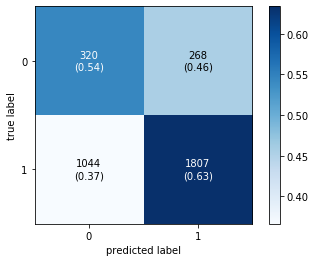

In [39]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()